Kako so cepiva vplivala na število Covid okužb?

In [2]:
import pandas as pd
age_cases = pd.read_csv("csv/age-cases.csv")
age_cases = age_cases.fillna(0)

age_vacc = pd.read_csv("csv/vaccination-by_age.csv")

age_vacc = age_vacc.fillna(0)


age_cases
age_vacc



,date,vaccination.age.0-11.1st.todate,vaccination.age.0-11.2nd.todate,vaccination.age.0-11.3rd.todate,vaccination.age.12-17.1st.todate,vaccination.age.12-17.2nd.todate,vaccination.age.12-17.3rd.todate,vaccination.age.18-24.1st.todate,vaccination.age.18-24.2nd.todate,vaccination.age.18-24.3rd.todate,...,vaccination.age.75-79.3rd.todate,vaccination.age.80-84.1st.todate,vaccination.age.80-84.2nd.todate,vaccination.age.80-84.3rd.todate,vaccination.age.85-89.1st.todate,vaccination.age.85-89.2nd.todate,vaccination.age.85-89.3rd.todate,vaccination.age.90+.1st.todate,vaccination.age.90+.2nd.todate,vaccination.age.90+.3rd.todate
0,2020-12-27,0.0,0.0,0.0,0.0,0.0,0.0,13,0.0,0.0,...,0.0,915,0.0,0.0,1231,0.0,0.0,1639,0.0,0.0
1,2020-12-28,0.0,0.0,0.0,0.0,0.0,0.0,23,0.0,0.0,...,0.0,1089,0.0,0.0,1482,0.0,0.0,1909,0.0,0.0
2,2020-12-29,0.0,0.0,0.0,0.0,0.0,0.0,35,0.0,0.0,...,0.0,1156,0.0,0.0,1558,0.0,0.0,1987,0.0,0.0
3,2020-12-30,0.0,0.0,0.0,0.0,0.0,0.0,40,0.0,0.0,...,0.0,1174,0.0,0.0,1568,0.0,0.0,1996,0.0,0.0
4,2020-12-31,0.0,0.0,0.0,1.0,0.0,0.0,57,0.0,0.0,...,0.0,1211,0.0,0.0,1584,0.0,0.0,2025,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,2022-03-27,2404.0,1775.0,4.0,38865.0,36443.0,749.0,86393,82040.0,23058.0,...,51179.0,54741,53805.0,40626.0,33288,32464.0,23324.0,17559,16839.0,10878.0
456,2022-03-28,2404.0,1775.0,4.0,38867.0,36445.0,759.0,86395,82045.0,23084.0,...,51184.0,54742,53805.0,40633.0,33288,32464.0,23329.0,17559,16839.0,10878.0
457,2022-03-29,2404.0,1775.0,4.0,38870.0,36450.0,776.0,86397,82052.0,23121.0,...,51189.0,54742,53808.0,40643.0,33288,32465.0,23332.0,17559,16839.0,10878.0
458,2022-03-30,2406.0,1781.0,4.0,38873.0,36460.0,791.0,86401,82055.0,23163.0,...,51211.0,54742,53808.0,40660.0,33288,32467.0,23340.0,17560,16840.0,10882.0


Za ugotavljanje delovanja cepiv, bomo primerjali podatke o cepljenih in o zbolelih po starostnih skupinah. Tabeli, ki ju bomo uporabili so vaccination-by_age.csv in age-cases.csv. V tabeli age-cases imamo za vsak dan od 2020-03-04 navedena števila okužb razdeljena po starosti ter spolu. 
V tabeli vaccination-by_age pa imamo števila cepljenih po starostnih skupinah.
Obe tabeli pa imata različno razporeditev let v starostnih skupinah, zato bomo naredili nove starostne skupine ter podatke v tableah združili.
Ker tabele vsebujejo število vseh odkritih okužb do danega datuma, bomo naredili 'odvod'-gledali bomo 14 dnevno spremembo stanja tako za okužbe kot za cepiva.

In [3]:
list_ages = ["0-24", "25-44", "45-64", "65-84", "85+"]
age_cases_new = pd.DataFrame()

age_cases_new["0-24"] = age_cases["age.0-4.todate"] + age_cases["age.5-14.todate"] + age_cases["age.15-24.todate"]
age_cases_new["25-44"] = age_cases["age.25-34.todate"] + age_cases["age.35-44.todate"]
age_cases_new["45-64"] = age_cases["age.45-54.todate"] + age_cases["age.55-64.todate"]
age_cases_new["65-84"] = age_cases["age.65-74.todate"] + age_cases["age.75-84.todate"]
age_cases_new["85+"] = age_cases["age.85+.todate"]
age_cases_new["sum"] = sum(age_cases_new[attr] for attr in list(age_cases_new)[1:])

age_cases_new = age_cases_new.diff(periods=14)
age_cases_new["date"] = age_cases["date"]

age_cases_new


,0-24,25-44,45-64,65-84,85+,sum,date
0,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-04
1,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-05
2,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-06
3,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-07
4,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-08
...,...,...,...,...,...,...,...
753,10185.0,12226.0,11634.0,4264.0,559.0,28683.0,2022-03-27
754,10047.0,12315.0,11689.0,4461.0,578.0,29043.0,2022-03-28
755,9834.0,12359.0,11792.0,4606.0,583.0,29340.0,2022-03-29
756,9550.0,12224.0,11778.0,4684.0,604.0,29290.0,2022-03-30


In [4]:
age_vacc_new = pd.DataFrame()
attrs_age_vacc = list(age_vacc)


age_vacc_new["0-24"] = sum(age_vacc[attr] for attr in [i for i in attrs_age_vacc[1:10] if "1st" in i])
age_vacc_new["25-44"] = sum(age_vacc[attr] for attr in [i for i in attrs_age_vacc[10:22] if "1st" in i])
age_vacc_new["45-64"] = sum(age_vacc[attr] for attr in [i for i in attrs_age_vacc[22:34] if "1st" in i])
age_vacc_new["65-84"] = sum(age_vacc[attr] for attr in [i for i in attrs_age_vacc[34:64] if "1st" in i])
age_vacc_new["85+"] = sum(age_vacc[attr] for attr in [i for i in attrs_age_vacc[46:] if "1st" in i])
age_vacc_new["sum"] = sum(age_vacc_new[attr] for attr in list(age_vacc_new)[1:])
age_vacc_new = age_vacc_new.diff(periods=14)
age_vacc_new["date"] = age_vacc["date"]
age_vacc_new


,0-24,25-44,45-64,65-84,85+,sum,date
0,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-27
1,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-28
2,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-29
3,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-30
4,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-31
...,...,...,...,...,...,...,...
455,112.0,129.0,72.0,56.0,11.0,268.0,2022-03-27
456,109.0,126.0,74.0,59.0,11.0,270.0,2022-03-28
457,108.0,115.0,74.0,53.0,9.0,251.0,2022-03-29
458,100.0,124.0,76.0,52.0,9.0,261.0,2022-03-30


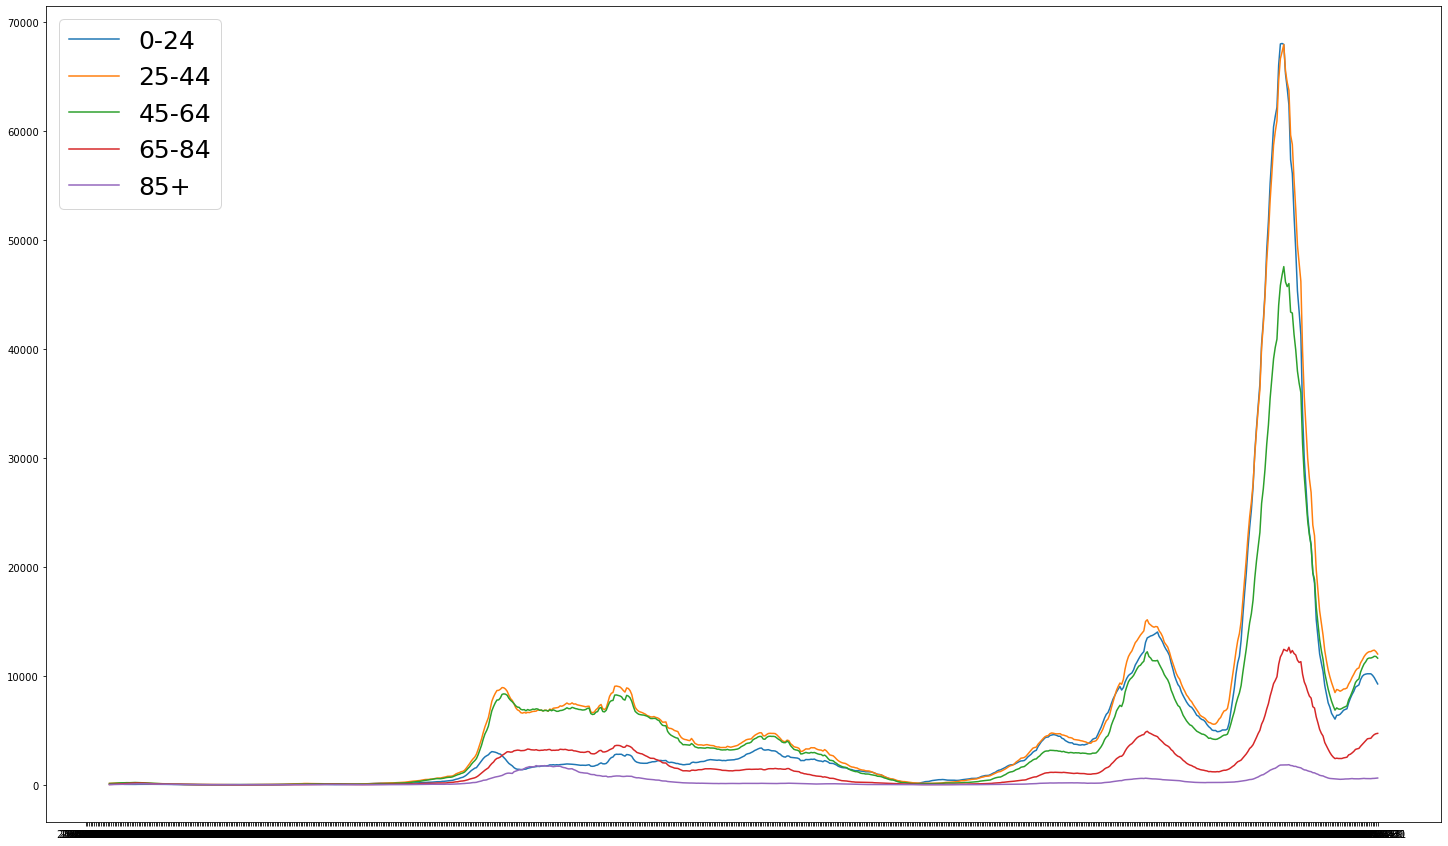

In [5]:
import matplotlib.pyplot as plt


plt.figure(figsize=(25,15))
plt.plot(age_cases_new["date"], age_cases_new["0-24"], label="0-24")
plt.plot(age_cases_new["date"], age_cases_new["25-44"], label="25-44")
plt.plot(age_cases_new["date"], age_cases_new["45-64"], label="45-64")
plt.plot(age_cases_new["date"], age_cases_new["65-84"], label="65-84")
plt.plot(age_cases_new["date"], age_cases_new["85+"], label="85+")
plt.legend(loc="upper left", prop={'size': 25})
plt.show()

Da bi dobili realnejšo sliko o okužbah po starostnih skupinah, je potrebno upoštevati tudi samo populacijo posamezne starostne skupine.

0-24, 515336
25-44, 558535
45-64, 599391
65-84, 381140
85+, 54575


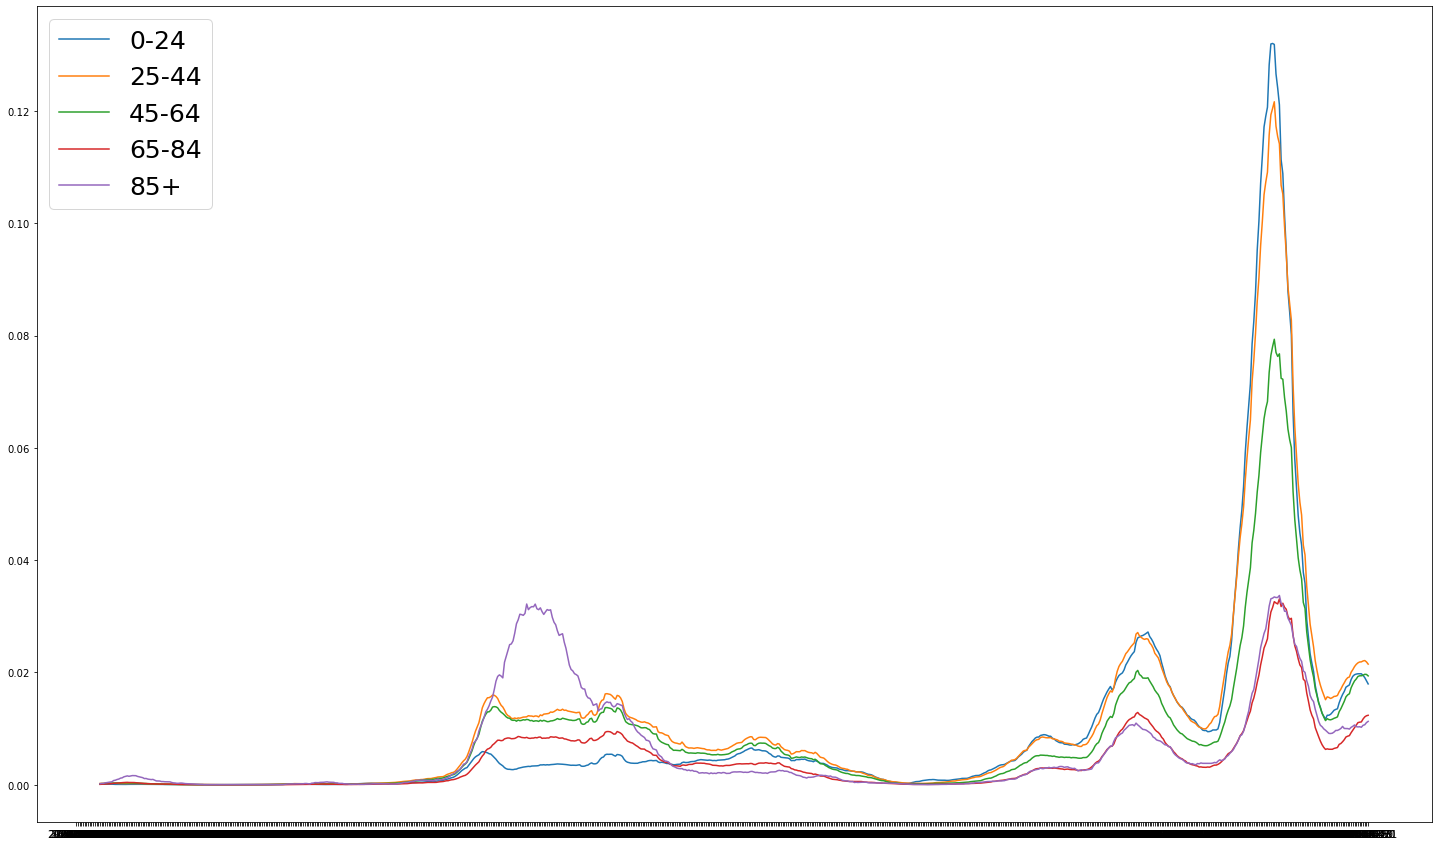

In [6]:
from csv import DictReader
population_age_dr = DictReader(open("csv/dict-age-groups.csv", "rt"))
population_age_temp = dict()
population_age = dict()

for i in population_age_dr:
    population_age_temp[i["id"]] = i["population"]

population_age["0-24"] = int(population_age_temp["0-4"]) + int(population_age_temp["5-14"]) + int(population_age_temp["15-24"])
population_age["25-44"] = int(population_age_temp["25-34"]) + int(population_age_temp["35-44"])
population_age["45-64"] = int(population_age_temp["45-54"]) + int(population_age_temp["55-64"])
population_age["65-84"] = int(population_age_temp["65-74"]) + int(population_age_temp["75-84"])
population_age["85+"] = int(population_age_temp["85+"])

age_cases_relative = pd.DataFrame()
age_cases_relative["date"] = age_cases_new["date"]

for i in list_ages:
    print("{}, {}".format(i, population_age[i]))
    age_cases_relative[i] = age_cases_new[i].div(population_age[i])

plt.figure(figsize=(25,15))

for i in list_ages:
    plt.plot(age_cases_relative["date"], age_cases_relative[i], label=i)

plt.legend(loc="upper left", prop={'size': 25})
plt.show()



Sedaj vidimo, da se je graf precej spremenil - vidimo da so v najstarejši starostni skupini ob prvem valu najbolj zbolevali, najmanjši delež bolanih pa je bilo v najmlajši starostni skupini.

Tukaj se pa pojavi nov probem: število novih okužb je povezano tudi s številom testov - tudi to bi radi vzeli v poštev.

Poglejmo še kako so se v posameznih starostnih skupinah ljudje cepili.

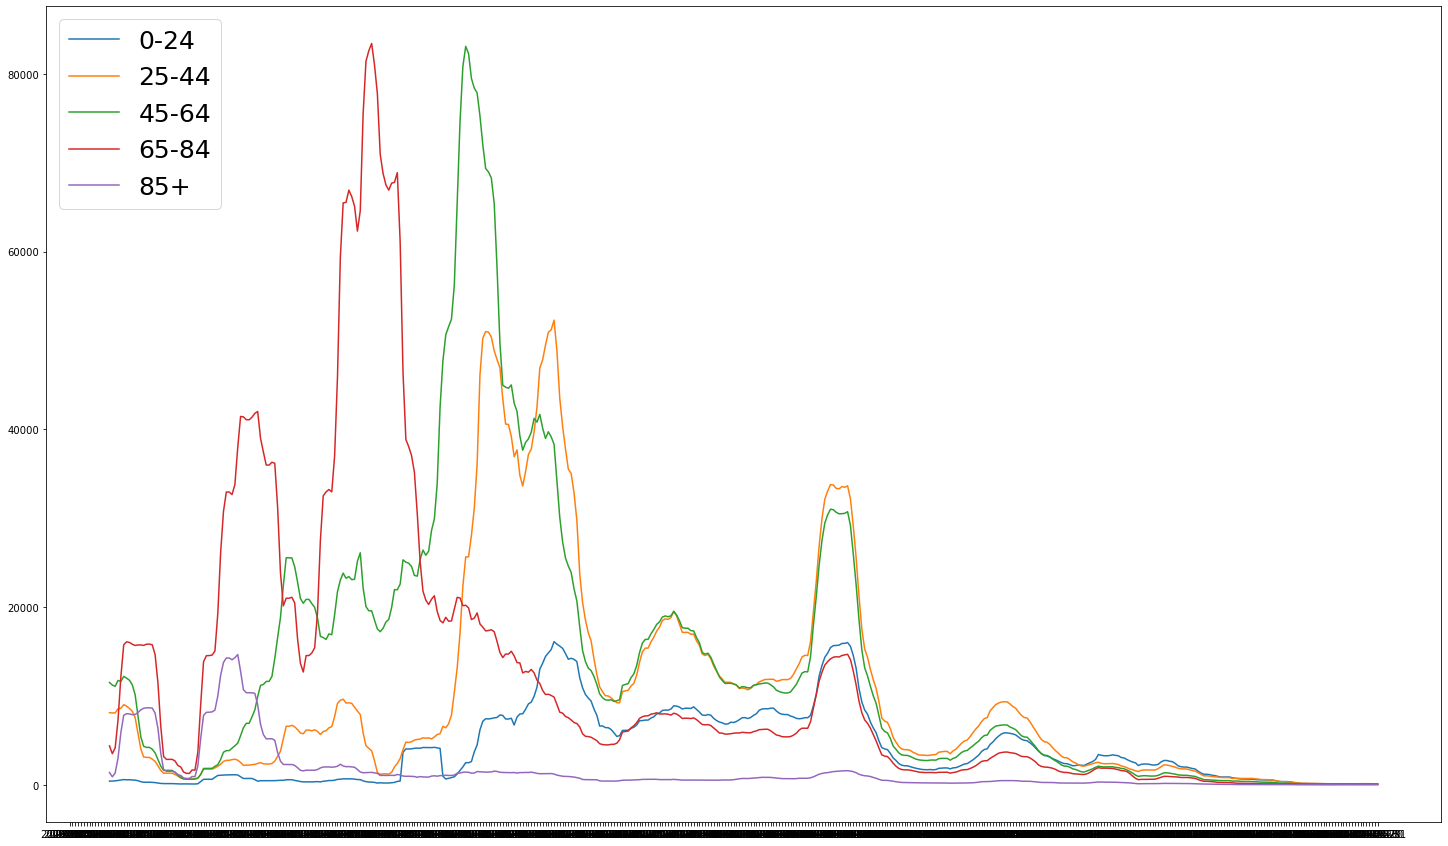

In [7]:
plt.figure(figsize=(25,15))
plt.plot(age_vacc_new["date"], age_vacc_new["0-24"], label="0-24")
plt.plot(age_vacc_new["date"], age_vacc_new["25-44"], label="25-44")
plt.plot(age_vacc_new["date"], age_vacc_new["45-64"], label="45-64")
plt.plot(age_vacc_new["date"], age_vacc_new["65-84"], label="65-84")
plt.plot(age_vacc_new["date"], age_vacc_new["85+"], label="85+")
plt.legend(loc="upper left", prop={'size': 25})
plt.show()

Podobno kot prej, je problem, da starostne skupine z večjo populacijo večjo moč, zato vzemimo to v zakup.
Ponovno delimo s skupnim številom populacije.

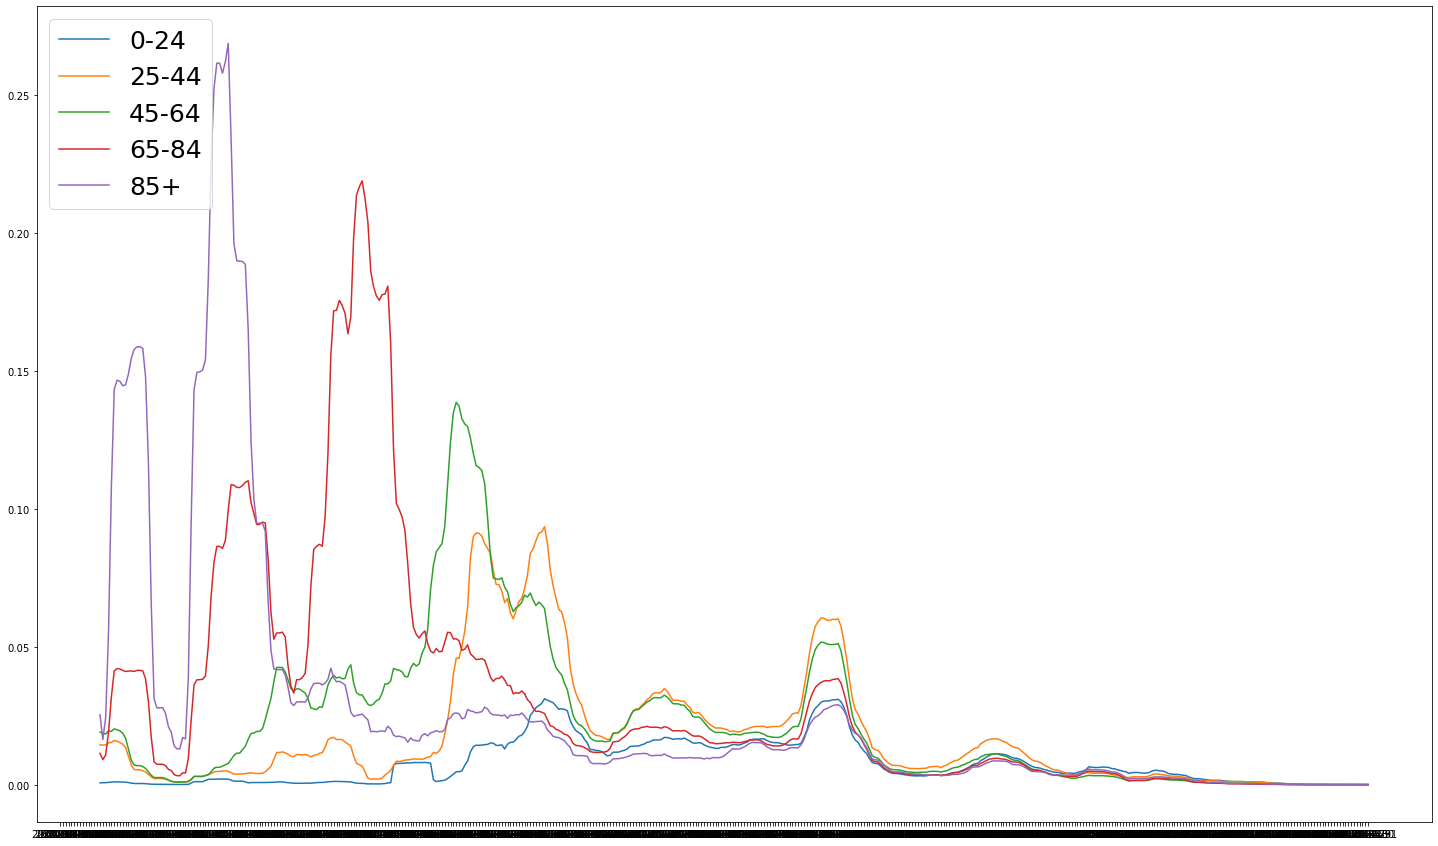

In [8]:
age_vacc_relative = pd.DataFrame()
age_vacc_relative["date"] = age_vacc_new["date"]

for i in list_ages:
    age_vacc_relative[i] = age_vacc_new[i].div(population_age[i])

plt.figure(figsize=(25,15))

for i in list_ages:
    plt.plot(age_vacc_relative["date"], age_vacc_relative[i], label=i)

plt.legend(loc="upper left", prop={'size': 25})
plt.show()


Tukaj lahko vidimo, kako je država izvajala plan ceplenja - starejši ljudje so bili prvi na vrsti, nato pa mlajši in mlajši.
Da pa lahko pogledamo ali je cepljenje pripomoglo k zmanjšanju okužb, moramo primerjati podatke.

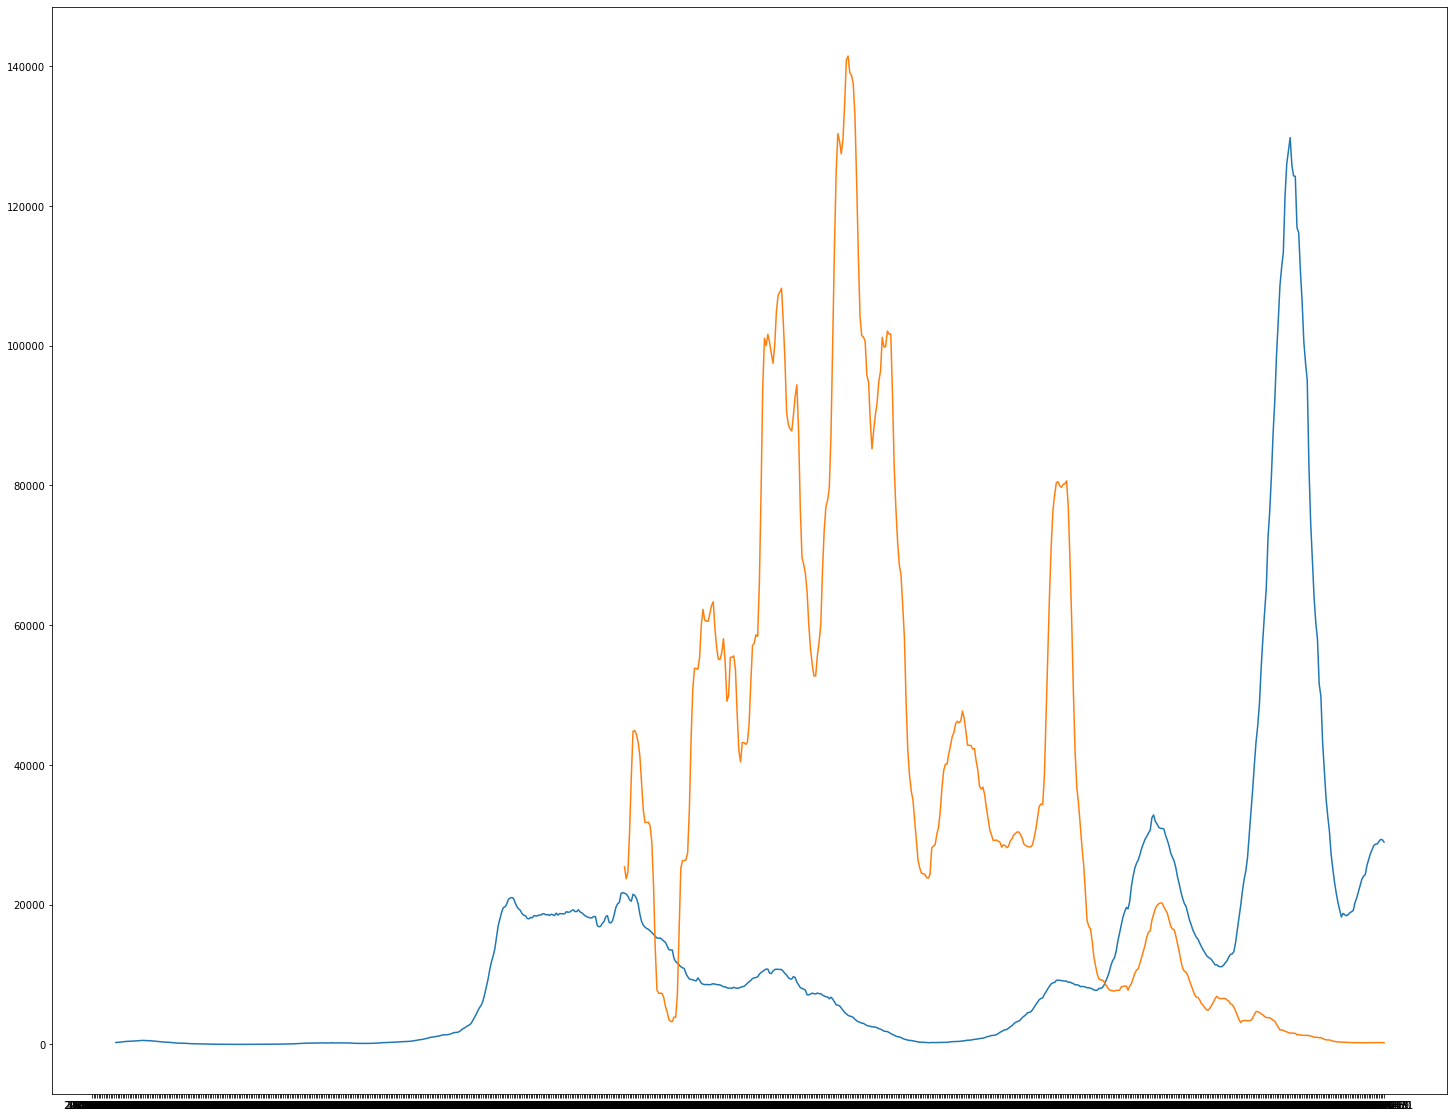

In [9]:
plt.figure(figsize=(25,20))
plt.plot(age_cases_new["date"], age_cases_new["sum"], label = "Število novih primerov na 14 dnevnem povprečju")
plt.plot(age_vacc_new["date"], age_vacc_new["sum"], label = "Število novih primerov na 14 dnevnem povprečju")
plt.show()

